### Contagem das palavras mais usadas no Plano de governo do PSL

#### Importacao de bibliotecas

In [1]:
import pandas as pd
import numpy as np
# http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.corpus import stopwords
from nltk import *
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Link do plano de governo

- [Plano de governo](https://www.pslnacional.org.br/)

### Conversao pdf to text

- Utilizei esse site on-line [https://pdftotext.com/](https://pdftotext.com/)

### Leitura do arquivo transformado em texto do original em pdf

In [2]:
with open('text/plano_governo_jair_bolsonaro.txt', 'r', encoding='UTF-8') as pl:
    big_string = ''
    for line in pl:
        split_line = line.split(' ')
        for word in split_line:
            big_string = big_string + ' ' + word

In [3]:
# criacao de lista de simbolos de pontuacao
punctuation = string.punctuation

In [4]:
# removendo quebras de linha '\n'
big_string = big_string.replace('\n ', ' ')

In [5]:
# retirando pontuacao
for p in punctuation:
    big_string = big_string.replace(p, '')

In [6]:
# convertendo tudo para lower case
big_string = big_string.lower()

In [7]:
# checando a conversao
big_string[0:1000]

' nossas ideias nosso compromisso é o de priorizar as seguintes questões abaixo relacionadas além de outras também abraçadas pelo partido a segurança pública nacional em todos os níveis prestigiando protegendo apoiando os respectivos órgãos que nela atuam tais como as polícias federal rodoviária federal militares e civis receita federal corpos de bombeiros as guardas municipais e as forças armadas b proposição de mudanças legislativas e implementação de políticas que visem minimizar os índices crescentes de violência e homicídios no país reduzindoos substancialmente no mais curto espaço de tempo possível c políticas de proteção às nossas fronteiras minimizando o contrabando e o tráfico de armas e de drogas d políticas de esclarecimento à população que visem a conscientização a respeito dos males provocados pelo comunismo e socialismo e proteção à propriedade privada e garantia de que cada cidadão de bem tenha o direito de proteger seu principal patrimônio sua vida para tanto é necessár

In [8]:
# comprimento da string
len(big_string)

8282

In [9]:
# nltk.download() # rodar apenas uma vez para baixar os pacotes

In [10]:
# lista de stopwords em portugues
stop_words = stopwords.words('portuguese')

In [11]:
# numero de stopwords
len(stop_words)

203

In [12]:
# aparando os detalhes
full_text = big_string
for s_word in stop_words:
    s_word = ' ' + s_word + ' '
    full_text = full_text.replace(s_word, ' ')
    full_text = full_text.replace(' é ', ' ')
    full_text = full_text.replace(' – ', ' ')
    full_text = full_text.replace(' • ', ' ')

In [13]:
# tamanho do texto apos limpeza
len(full_text)

6579

In [14]:
# quantidade de caracteres removidos
len(big_string)-len(full_text)

1703

In [15]:
# transformando a string em lista
full_text = [full_text]

In [16]:
# separando palavra por palavra
freq_full_text = full_text[0].split(' ')

### Documentacao FreqDist

- [FreqDist](http://www.nltk.org/api/nltk.html?highlight=freqdist)

In [17]:
# Contando a frequencia de cada palavra com a funcao FreqDist
freq_full_text = FreqDist(freq_full_text)

In [18]:
# as 100 palavras mais comuns
hundred_most_common = freq_full_text.most_common(100)
# removendo primeiro elemento da lista ''
hundred_most_common = hundred_most_common[1:]
# imprime as 10 primeiras
hundred_most_common[:9]

[('governo', 7),
 ('federal', 6),
 ('vida', 6),
 ('devem', 6),
 ('privada', 5),
 ('cidadãos', 5),
 ('combate', 5),
 ('deve', 5),
 ('poderes', 5)]

In [19]:
# 
x = []
y = []
for i in hundred_most_common[0:29]:
    x.append(i[0])
    y.append(i[1])

In [20]:
d = {'palavra': x, 'frequencia': y}
df_r = pd.DataFrame(d)

In [21]:
df_r.frequencia = df_r.frequencia/df_r.loc[0, 'frequencia']

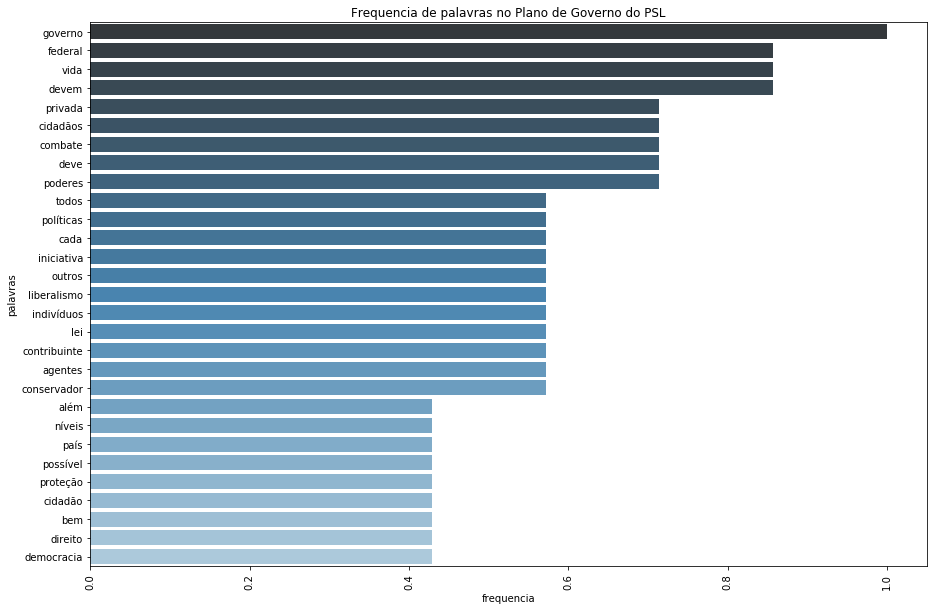

In [22]:
plt.figure(figsize=(15,10))
sns.barplot(df_r.frequencia, df_r.palavra, palette="Blues_d")
plt.title("Frequencia de palavras no Plano de Governo do PSL")
plt.xticks(rotation=90)
plt.xlabel('frequencia')
plt.ylabel('palavras')
plt.show()

In [23]:
# Lista completa das 100 mais frequentes
hundred_most_common

[('governo', 7),
 ('federal', 6),
 ('vida', 6),
 ('devem', 6),
 ('privada', 5),
 ('cidadãos', 5),
 ('combate', 5),
 ('deve', 5),
 ('poderes', 5),
 ('todos', 4),
 ('políticas', 4),
 ('cada', 4),
 ('iniciativa', 4),
 ('outros', 4),
 ('liberalismo', 4),
 ('indivíduos', 4),
 ('lei', 4),
 ('contribuinte', 4),
 ('agentes', 4),
 ('conservador', 4),
 ('além', 3),
 ('níveis', 3),
 ('país', 3),
 ('possível', 3),
 ('proteção', 3),
 ('cidadão', 3),
 ('bem', 3),
 ('direito', 3),
 ('democracia', 3),
 ('fim', 3),
 ('públicos', 3),
 ('qualidade', 3),
 ('todas', 3),
 ('países', 3),
 ('econômico', 3),
 ('empresas', 3),
 ('acreditamos', 3),
 ('fazer', 3),
 ('mãos', 3),
 ('brasília', 3),
 ('impostos', 3),
 ('realidade', 3),
 ('local', 3),
 ('melhor', 3),
 ('dinheiro', 3),
 ('instituições', 3),
 ('defendemos', 3),
 ('poder', 3),
 ('outras', 2),
 ('respectivos', 2),
 ('órgãos', 2),
 ('tais', 2),
 ('mudanças', 2),
 ('visem', 2),
 ('tempo', 2),
 ('armas', 2),
 ('respeito', 2),
 ('garantia', 2),
 ('possam', 2)

In [24]:
words = []
for i in hundred_most_common:
    words.append(i[0])
words[:9]

['governo',
 'federal',
 'vida',
 'devem',
 'privada',
 'cidadãos',
 'combate',
 'deve',
 'poderes']

In [25]:
text = full_text[0].split(' ')
freq_exp = {}
for i in range(len(words)):
    for j in range(len(text)):
        if words[i] == text[j]:
            if text[j-1]:
                string = text[j-1] + ' ' + text[j] + ' ' + text[j+1]
                if not string in freq_exp:
                    freq_exp[string] = 1
                else:
                    freq_exp[string] = freq_exp[string] + 1

In [26]:
# lista das expressoes mais frequentes no texto que usam palavras mais frequentes (lista anterior)
for key, value in freq_exp.items():
    if value >=2:
        print(key, value)